In [1]:
# Necessary imports
import pandas as pd
import numpy as np
#import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pylab as plb 
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error

from model_evaluation import model_eval_with_alphavec, model_eval_with_alpha

#sns.set(context='notebook', style='whitegrid', font_scale=1.2)

## Data Import

In [2]:
sf = pd.read_csv('data_files/sf_clean.csv')

# Reformatting hood_district names
sf['hood_district'] = sf['hood_district'].astype(int)
sf['hood_district'] = sf['hood_district'].astype(str)

### Outliers (price > 10k per month)

In [3]:
sf = sf[sf['price'] < 10000]

## Feature Selection / Engineering

In [4]:
sf = sf.drop(['pets', 'housing_type'], axis=1)

In [5]:
# sns.pairplot(sf, height=2, aspect=1.25, corner=True);

In [6]:
sf = pd.get_dummies(sf)

In [7]:
cols_to_drop = ['laundry_(c) no laundry',
                'laundry_(b) on-site',
               #'pets_(d) no pets', 
               #'housing_type_(c) multi', 
               'parking_(d) no parking',
               'hood_district_10']

sf = sf.drop(cols_to_drop, axis=1)

In [8]:
sf.head()

,price,sqft,beds,bath,laundry_(a) in-unit,parking_(a) valet,parking_(b) protected,parking_(c) off-street,hood_district_1,hood_district_2,hood_district_3,hood_district_4,hood_district_5,hood_district_6,hood_district_7,hood_district_8,hood_district_9
0,6800,1600.0,2.0,2.0,1,0,1,0,0,0,0,0,0,0,1,0,0
1,3500,550.0,1.0,1.0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,5100,1300.0,2.0,1.0,1,0,0,0,0,0,0,0,0,0,1,0,0
3,9000,3500.0,3.0,2.5,1,0,1,0,0,0,0,0,0,0,1,0,0
4,3100,561.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,1,0,0


## Model Evaluation

In [9]:
X, y = sf.drop('price',axis=1), sf['price']

In [10]:
rando_states = list(range(2, 16, 2))
rando_states

[2, 4, 6, 8, 10, 12, 14]

In [11]:
alphavec = 10**np.linspace(-2,1,100)

## Lasso

### Alpha evaluation

In [12]:
model_eval_with_alphavec(rando_states, alphavec, X, y, model_type='lasso')

Model Type:  lasso
Alpha evaluation in progress...

Random State:  2
~~~~~~~~~~~~~~~~~~
Best Alpha:  0.01
Lasso Regression train R^2: 0.80366
Lasso Regression test R^2: 0.78244

Train/Val R^2 Ratio:  1.02713

RMSE :  567.9705460666755
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Random State:  4
~~~~~~~~~~~~~~~~~~
Best Alpha:  0.30538555088334157
Lasso Regression train R^2: 0.80580
Lasso Regression test R^2: 0.78161

Train/Val R^2 Ratio:  1.03096

RMSE :  533.2416586412728
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Random State:  6
~~~~~~~~~~~~~~~~~~
Best Alpha:  0.01
Lasso Regression train R^2: 0.80310
Lasso Regression test R^2: 0.81334

Train/Val R^2 Ratio:  0.98741

RMSE :  591.1826013988381
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Random State:  8
~~~~~~~~~~~~~~~~~~
Best Alpha:  0.26560877829466867
Lasso Regression train R^2: 0.80912
Lasso Regression test R^2: 0.75757

Train/Val R^2 Ratio:  1.06805

RMSE :  654.6786026635875
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Random State:  10
~~~~~~~~~~~~~~~~~~
B

### Alpha chosen

In [28]:
las_alpha = 0.1
rando_states = list(range(0, 10))
len(rando_states)

10

In [30]:
model_eval_with_alpha(rando_states, X, y, model_type='lasso', alpha=las_alpha)

Model Type:  lasso
Alpha evaluation in progress...

Random State:  0
~~~~~~~~~~~~~~~~~~
Lasso Regression train R^2: 0.85837
Lasso Regression test R^2: 0.73427

Train/Val R^2 Ratio:  1.16901

RMSE :  1002.7529438425668
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Random State:  1
~~~~~~~~~~~~~~~~~~
Lasso Regression train R^2: 0.84450
Lasso Regression test R^2: 0.89552

Train/Val R^2 Ratio:  0.94302

RMSE :  455.59057680159145
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Random State:  2
~~~~~~~~~~~~~~~~~~
Lasso Regression train R^2: 0.82568
Lasso Regression test R^2: 0.88151

Train/Val R^2 Ratio:  0.93666

RMSE :  499.774857668401
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Random State:  3
~~~~~~~~~~~~~~~~~~
Lasso Regression train R^2: 0.85455
Lasso Regression test R^2: 0.45256

Train/Val R^2 Ratio:  1.88825

RMSE :  686.5415354161412
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Random State:  4
~~~~~~~~~~~~~~~~~~
Lasso Regression train R^2: 0.86081
Lasso Regression test R^2: 0.53405

Train/Val R^2 Ratio:  1.61185



### Charts

In [15]:
# Training versus Test Data
# hold out 20% of the data for testing
X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=72)

# Scaling for Ridge & Lasso 
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X.values)
X_test_scaled = scaler.transform(X_test.values)

In [16]:
las = Lasso(alpha=las_alpha)

las.fit(X_train_scaled, y)
print(f'Ridge Regression train R^2: {las.score(X_train_scaled, y):.5f}')
print(f'Ridge Regression test R^2: {las.score(X_test_scaled, y_test):.5f}')

Ridge Regression train R^2: 0.80585
Ridge Regression test R^2: 0.77966


In [17]:
las_predict = las.predict(X_test_scaled)

rmse = mean_squared_error(y_test, las_predict, squared=False)
print(rmse)

659.2533853594322


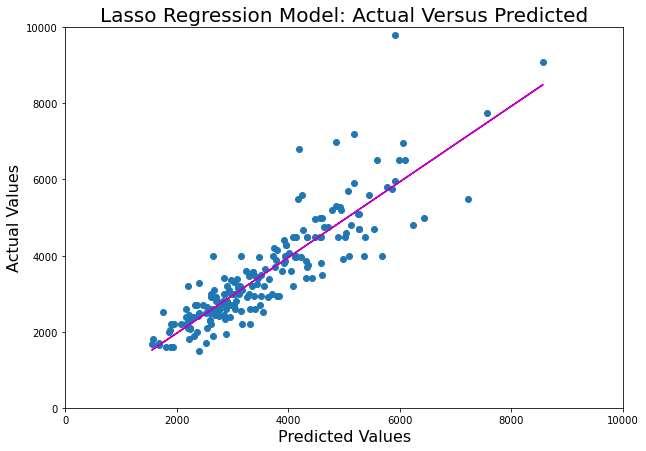

In [18]:
plt.figure(figsize=(10, 7))
plt.scatter(las_predict, y_test) 

z = np.polyfit(las_predict, y_test, 1)
p = np.poly1d(z)
plb.plot(las_predict, p(las_predict), 'm-')

plt.xlim(0, 10000)
plt.ylim(0, 10000)

plt.title('Lasso Regression Model: Actual Versus Predicted', fontsize=20)
plt.xlabel('Predicted Values', fontsize=16)
plt.ylabel('Actual Values', fontsize=16);

## Ridge

### alpha evaluation

In [19]:
model_eval_with_alphavec(rando_states, alphavec, X, y, model_type='ridge')

Model Type:  ridge
Alpha evaluation in progress...

Random State:  0
~~~~~~~~~~~~~~~~~~
Best Alpha:  0.01
Lasso Regression train R^2: 0.79610
Lasso Regression test R^2: 0.82730

Train/Val R^2 Ratio:  0.96228

RMSE :  640.1227715110009
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Random State:  1
~~~~~~~~~~~~~~~~~~
Best Alpha:  2.31012970008316
Lasso Regression train R^2: 0.78849
Lasso Regression test R^2: 0.81308

Train/Val R^2 Ratio:  0.96975

RMSE :  543.1236167508247
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Random State:  2
~~~~~~~~~~~~~~~~~~
Best Alpha:  1.629750834620645
Lasso Regression train R^2: 0.78565
Lasso Regression test R^2: 0.79059

Train/Val R^2 Ratio:  0.99376

RMSE :  618.7189460980662
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Random State:  3
~~~~~~~~~~~~~~~~~~
Best Alpha:  0.01
Lasso Regression train R^2: 0.79503
Lasso Regression test R^2: 0.70237

Train/Val R^2 Ratio:  1.13192

RMSE :  585.5596704181756
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Random State:  4
~~~~~~~~~~~~~~~~~~
Best Al

### alpha chosen

In [31]:
#rid_alpha = 1.5352750287804227
#rid_alpha = 5
rid_alpha = 0.6
rando_states = list(range(0, 10))
len(rando_states)

10

In [32]:
model_eval_with_alpha(rando_states, X, y, model_type='ridge', alpha=rid_alpha)

Model Type:  ridge
Alpha evaluation in progress...

Random State:  0
~~~~~~~~~~~~~~~~~~
Lasso Regression train R^2: 0.85826
Lasso Regression test R^2: 0.73480

Train/Val R^2 Ratio:  1.16801

RMSE :  1001.7505096978045
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Random State:  1
~~~~~~~~~~~~~~~~~~
Lasso Regression train R^2: 0.84433
Lasso Regression test R^2: 0.89663

Train/Val R^2 Ratio:  0.94167

RMSE :  453.17872538400627
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Random State:  2
~~~~~~~~~~~~~~~~~~
Lasso Regression train R^2: 0.82523
Lasso Regression test R^2: 0.88528

Train/Val R^2 Ratio:  0.93217

RMSE :  491.7614573801752
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Random State:  3
~~~~~~~~~~~~~~~~~~
Lasso Regression train R^2: 0.85385
Lasso Regression test R^2: 0.46677

Train/Val R^2 Ratio:  1.82928

RMSE :  677.5781143204365
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Random State:  4
~~~~~~~~~~~~~~~~~~
Lasso Regression train R^2: 0.85986
Lasso Regression test R^2: 0.59163

Train/Val R^2 Ratio:  1.45338


In [33]:
rid = Ridge(alpha=rid_alpha)

rid.fit(X_train_scaled, y)
print(f'Ridge Regression train R^2: {rid.score(X_train_scaled, y):.5f}')
print(f'Ridge Regression test R^2: {rid.score(X_test_scaled, y_test):.5f}')

Ridge Regression train R^2: 0.83585
Ridge Regression test R^2: 0.79249


In [34]:
rid_predict = rid.predict(X_test_scaled)

mean_squared_error(y_test, rid_predict, squared=False)

701.0387314076631

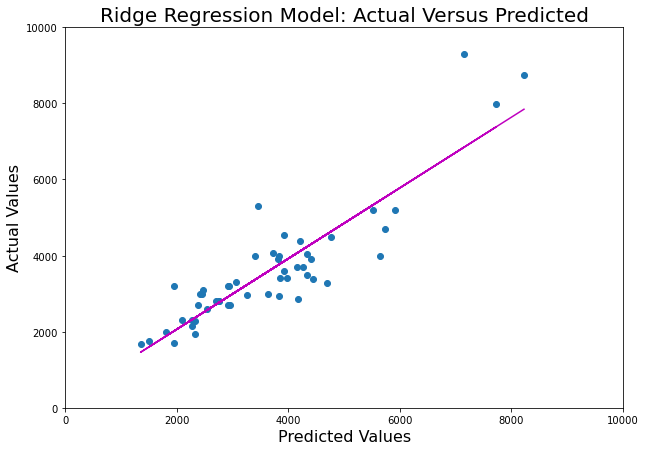

In [35]:
plt.figure(figsize=(10, 7))
plt.scatter(rid_predict, y_test) 

z = np.polyfit(rid_predict, y_test, 1)
p = np.poly1d(z)
plb.plot(rid_predict, p(rid_predict), 'm-')

plt.xlim(0, 10000)
plt.ylim(0, 10000)

plt.title('Ridge Regression Model: Actual Versus Predicted', fontsize=20)
plt.xlabel('Predicted Values', fontsize=16)
plt.ylabel('Actual Values', fontsize=16);

## Evaluation

In [36]:
sf2 = sf.copy()

rid_alpha = 0.6
las_alpha = 0.1

X, y = sf2.drop('price',axis=1), sf2['price']

random_state_range = list(range(2, 16, 2))

lin_count = 0
ridge_count = 0
lasso_count = 0

for state in random_state_range:
    # Training versus Test Data
    # hold out 20% of the data for testing
    X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=state)

    # Scaling for Ridge & Lasso 
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X.values)
    X_test_scaled = scaler.transform(X_test.values)
    
    print("RANDOM STATE: ", state)
    print("~~~~~~~~~~~~~~~~~~~~~~~~~\n")
    
    # Linear Regression
    lin = LinearRegression()
    lin.fit(X, y)
    print(f'Linear Regression train R^2: {lin.score(X, y):.5f}')
    print(f'Linear Regression val R^2: {lin.score(X_test, y_test):.5f}')
    
    lin_predict = lin.predict(X_test)
    lin_rmse = mean_squared_error(y_test, lin_predict, squared=False)
    print(f'RMSE: {lin_rmse:.5}')
    print("")
    
    # LASSO
    las = Lasso(alpha=rid_alpha)
    las.fit(X_train_scaled, y)
    print("LASSO\n")
    print(f'Ridge Regression train R^2: {las.score(X_train_scaled, y):.5f}')
    print(f'Ridge Regression test R^2: {las.score(X_test_scaled, y_test):.5f}')
    
    las_predict = las.predict(X_test_scaled)
    las_rmse = mean_squared_error(y_test, las_predict, squared=False)
    print(f'RMSE: {las_rmse:.5}')
    print("")
    
    # RIDGE
    rid = Ridge(alpha=rid_alpha)
    rid.fit(X_train_scaled, y)
    print("RIDGE\n")
    print(f'Ridge Regression train R^2: {rid.score(X_train_scaled, y):.5f}')
    print(f'Ridge Regression test R^2: {rid.score(X_test_scaled, y_test):.5f}')
    rid_predict = rid.predict(X_test_scaled)
    rid_rmse = mean_squared_error(y_test, rid_predict, squared=False)
    print(f'RMSE: {rid_rmse:.5}')
    print("~~~~~~~~~~~~~~~~~~~~~~~~~\n")
    
    if lin_rmse < las_rmse and lin_rmse < rid_rmse:
        lin_count += 1
    elif las_rmse < lin_rmse and las_rmse < rid_rmse:
        lasso_count += 1
    else:
        ridge_count += 1
        
print("\nFinal Tally --")     
print("Linear: ", lin_count)
print("Lasso: ", lasso_count)
print("Ridge: ", ridge_count)

RANDOM STATE:  2
~~~~~~~~~~~~~~~~~~~~~~~~~

Linear Regression train R^2: 0.80366
Linear Regression val R^2: 0.78244
RMSE: 567.96

LASSO

Ridge Regression train R^2: 0.80362
Ridge Regression test R^2: 0.78210
RMSE: 568.41

RIDGE

Ridge Regression train R^2: 0.80365
Ridge Regression test R^2: 0.78235
RMSE: 568.08
~~~~~~~~~~~~~~~~~~~~~~~~~

RANDOM STATE:  4
~~~~~~~~~~~~~~~~~~~~~~~~~

Linear Regression train R^2: 0.80581
Linear Regression val R^2: 0.78196
RMSE: 532.81

LASSO

Ridge Regression train R^2: 0.80578
Ridge Regression test R^2: 0.78126
RMSE: 533.67

RIDGE

Ridge Regression train R^2: 0.80580
Ridge Regression test R^2: 0.78184
RMSE: 532.96
~~~~~~~~~~~~~~~~~~~~~~~~~

RANDOM STATE:  6
~~~~~~~~~~~~~~~~~~~~~~~~~

Linear Regression train R^2: 0.80310
Linear Regression val R^2: 0.81333
RMSE: 591.2

LASSO

Ridge Regression train R^2: 0.80307
Ridge Regression test R^2: 0.81398
RMSE: 590.16

RIDGE

Ridge Regression train R^2: 0.80309
Ridge Regression test R^2: 0.81374
RMSE: 590.54
~~~~~~~~